### 의사결정나무 예시 코드

In [58]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [59]:
iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.2,random_state=12345)

In [60]:
dt = DecisionTreeClassifier(random_state=12345)

In [61]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=12345)

In [62]:
y_pred = dt.predict(X_test)

In [63]:
accuracy = metrics.accuracy_score(y_test,y_pred)
matrix = metrics.confusion_matrix(y_test,y_pred)

In [64]:
accuracy

0.9666666666666667

In [65]:
matrix

array([[11,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  7]])

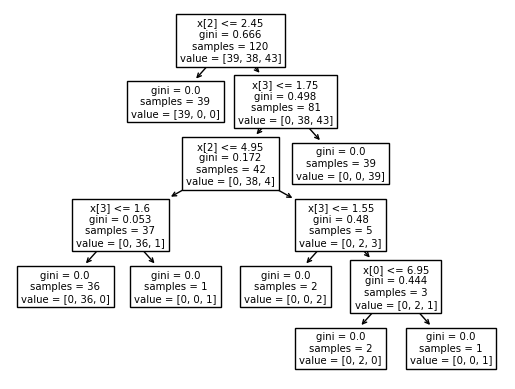

In [66]:
plot_tree(dt)
plt.show()

In [67]:
dt.feature_importances_

array([0.01669101, 0.        , 0.53114713, 0.45216186])

---

### GMM 예시 코드

In [68]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd

In [69]:
# 2차원으로 줄이는 코드
pca = PCA(n_components=2)

In [70]:
iris_pca = pca.fit_transform(iris.data)

In [71]:
gmm = GaussianMixture(n_components=3, random_state=12345)

In [72]:
gmm_y = gmm.fit_predict(iris_pca)

In [73]:
gmm_y 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [74]:
iris_df = pd.DataFrame(iris_pca)

<Axes: xlabel='0', ylabel='1'>

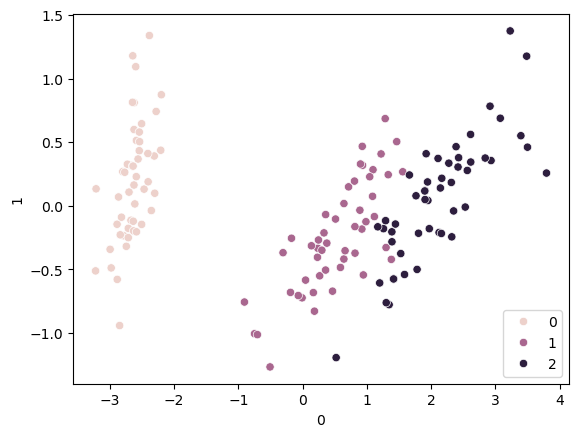

In [75]:
sns.scatterplot(
    iris_df,
    x=0,
    y=1,
    hue=iris.target
)

<Axes: xlabel='0', ylabel='1'>

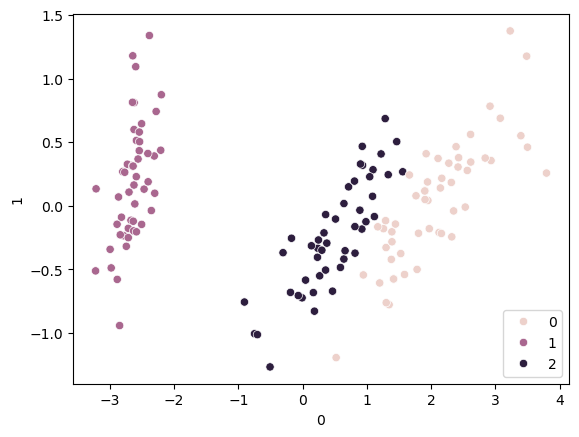

In [76]:
sns.scatterplot(
    iris_df,
    x=0,
    y=1,
    hue=gmm_y
)

---

### 회귀 모델 - 선형 회귀

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
crab = pd.read_csv('data/CrabAgePrediction.csv')

In [79]:
reg = LinearRegression()

<Axes: xlabel='Length', ylabel='Age'>

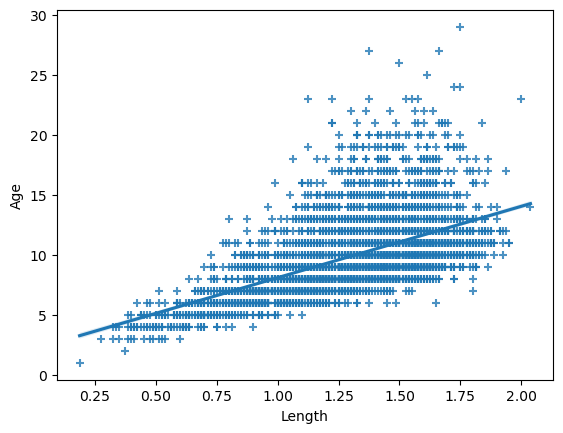

In [80]:
sns.regplot(
    data=crab,
    x='Length',
    y='Age',
    marker='+'
)

In [81]:
crab['Length']

0       1.4375
1       0.8875
2       1.0375
3       1.1750
4       0.8875
         ...  
3888    1.4625
3889    1.5500
3890    0.6250
3891    1.0625
3892    0.7875
Name: Length, Length: 3893, dtype: float64

In [82]:
# 2차원으로 변환
crab['Length'].values.reshape(-1,1)

array([[1.4375],
       [0.8875],
       [1.0375],
       ...,
       [0.625 ],
       [1.0625],
       [0.7875]])

In [83]:
reg.fit(crab['Length'].values.reshape(-1,1),crab['Age'])

LinearRegression()

In [84]:
# Length 를 넣으면 Age 를 예측
reg.predict([[3]])

array([20.00245614])

---

### k-Fold CV
- 위에서 실행한 의사결정 나무 코드를 활용

In [98]:
# 5-fold CV
from sklearn.model_selection import KFold
import numpy as np

In [99]:
kfold = KFold(n_splits=5, shuffle=False)
cv_ind = kfold.split(iris.data)

In [100]:
cv_accuracy = []
ind = 1

In [101]:
for train_ind, test_ind in cv_ind:
    X_train,X_test = iris.data[train_ind],iris.data[test_ind]
    y_train,y_test = iris.target[train_ind],iris.target[test_ind]
    
    dt = DecisionTreeClassifier(random_state=12345)
    dt.fit(X_train,y_train)
    
    accu = dt.score(X_test,y_test)
    
    print(f'{ind}번째 CV accu : {accu:.2%}')
    cv_accuracy.append(accu)
    ind+=1
    
np.mean(cv_accuracy)

1번째 CV accc : 100.00%
2번째 CV accc : 100.00%
3번째 CV accc : 83.33%
4번째 CV accc : 93.33%
5번째 CV accc : 73.33%


0.9

---

### Stratified k-Fold CV

In [102]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5)
cv_ind = kfold.split(iris.data,iris.target)

In [103]:
cv_accuracy = []
ind = 1

In [104]:
for train_ind, test_ind in cv_ind:
    X_train,X_test = iris.data[train_ind],iris.data[test_ind]
    y_train,y_test = iris.target[train_ind],iris.target[test_ind]
    
    dt = DecisionTreeClassifier(random_state=12345)
    dt.fit(X_train,y_train)
    
    accu = dt.score(X_test,y_test)
    
    print(f'{ind}번째 CV accu : {accu:.2%}')
    cv_accuracy.append(accu)
    ind+=1
    
np.mean(cv_accuracy)

1번째 CV accc : 96.67%
2번째 CV accc : 96.67%
3번째 CV accc : 90.00%
4번째 CV accc : 96.67%
5번째 CV accc : 100.00%


0.9600000000000002